In [1]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [31]:
# A few relevant paths/settings
data_dir = "/Users/amlalejini/DataPlayground/signal-gp-benchmarking/binding_threshold"
fit_500_fpath = os.path.join(data_dir, "fitness_500.csv")
fit_1000_fpath = os.path.join(data_dir, "fitness_1000.csv")
fit_5000_fpath = os.path.join(data_dir, "fitness_5000.csv")
fit_10000_fpath = os.path.join(data_dir, "fitness_10000.csv")


In [32]:
# Load data!
# For this, we'll only look at ES16

updates = {"500": fit_500_fpath,
           "1000": fit_1000_fpath,
           "5000": fit_5000_fpath,
           "10000": fit_10000_fpath}

dfs = {}
for update in updates:
    dfs[update] = {"FULL":None, "FC16":None, "FC32":None}
    dfs[update]["FULL"] = pd.read_csv(updates[update], dtype={"benchmark":str, "treatment":str, "run_id":str, "update":int, "mean_fitness":float, "max_fitness":float})
    # Filter out non 16-state environment
    dfs[update]["FULL"] = dfs[update]["FULL"][dfs[update]["FULL"]["treatment"].str.contains("_ES16_")]
    # Filter out non randomly generated tags
    dfs[update]["FULL"] = dfs[update]["FULL"][dfs[update]["FULL"]["treatment"].str.contains("RNDSIG1")]
    
    dfs[update]["FC16"] = dfs[update]["FULL"][dfs[update]["FULL"]["treatment"].str.contains("HWFUNCNT16")]
    dfs[update]["FC32"] = dfs[update]["FULL"][dfs[update]["FULL"]["treatment"].str.contains("HWFUNCNT16")==False]
    




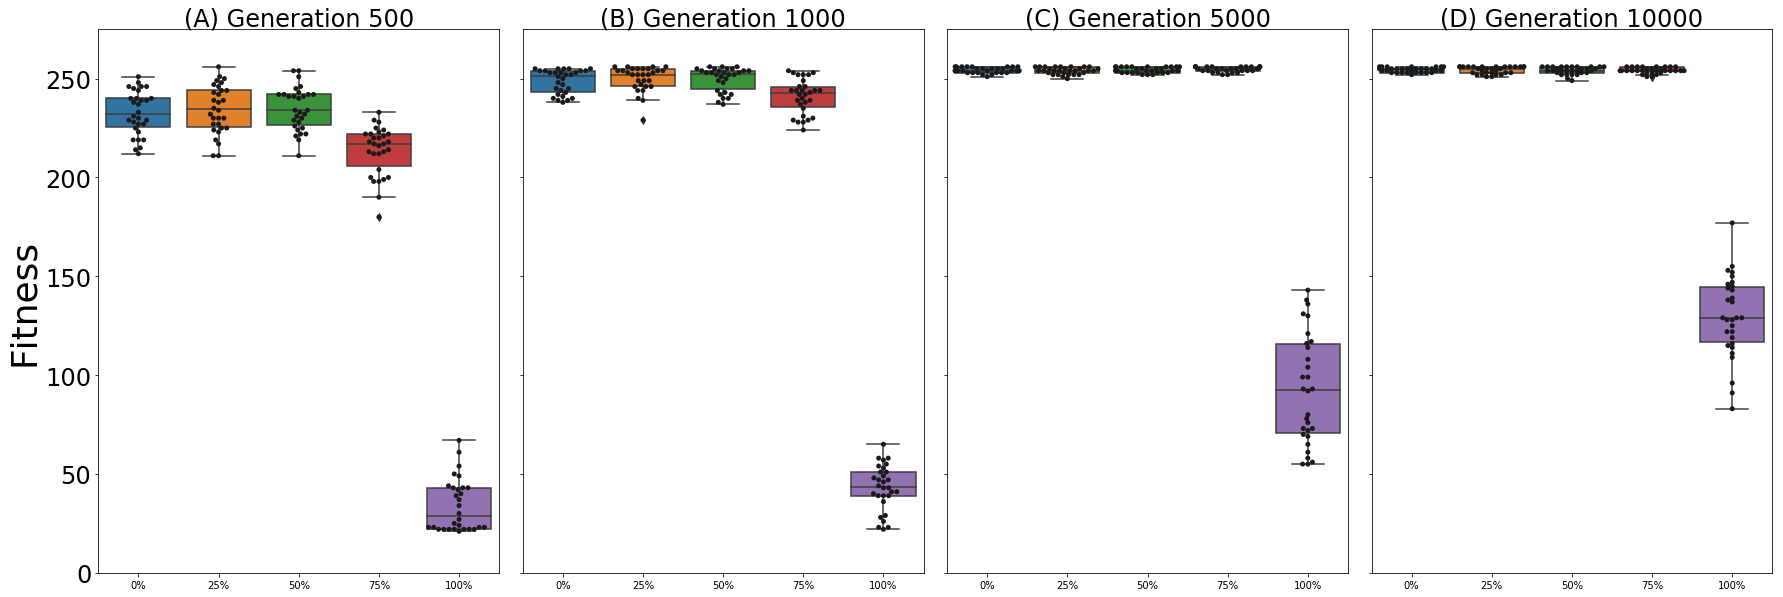

In [40]:
# Importance of imprecision
df_500 = dfs["500"]["FC16"][dfs["500"]["FC16"]["treatment"].str.contains("_FS0_")] 
df_1000 = dfs["1000"]["FC16"][dfs["1000"]["FC16"]["treatment"].str.contains("_FS0_")] 
df_5000 = dfs["5000"]["FC16"][dfs["5000"]["FC16"]["treatment"].str.contains("_FS0_")] 
df_10000 = dfs["10000"]["FC16"][dfs["10000"]["FC16"]["treatment"].str.contains("_FS0_")]

order_ES16 = ["BT0.0_ES16_FS0_RNDSIG1_HWCORES4_HWFUNCNT16", "BT0.25_ES16_FS0_RNDSIG1_HWCORES4_HWFUNCNT16", "BT0.50_ES16_FS0_RNDSIG1_HWCORES4_HWFUNCNT16", "BT0.75_ES16_FS0_RNDSIG1_HWCORES4_HWFUNCNT16", "BT1.0_ES16_FS0_RNDSIG1_HWCORES4_HWFUNCNT16"]
labels = ["0%", "25%", "50%", "75%", "100%"]

fig = plt.figure(1)
gridspec.GridSpec(1,12)
fig.set_size_inches(30,10)

y_lim_max = 275
y_tick_labels_fs = 24
y_axis_label_fs = 36
x_axis_label_fs = 24

ax1 = plt.subplot2grid((1,12),(0,0),colspan=3)
plot1 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_500,  orient = "v", order=order_ES16,ax=ax1)
sns.swarmplot(x="treatment", y="max_fitness", data=df_500, orient="v", order=order_ES16, ax=ax1, color=".1")
ax1.set_xticklabels(labels)
ax1.set_xlabel("(A) Generation 500")
ax1.set_ylabel("Fitness")
ax1.set_ylim(0, y_lim_max)
for thing in ax1.get_yticklabels():
    thing.set_fontsize(y_tick_labels_fs)
ax1.yaxis.label.set_fontsize(y_axis_label_fs)
ax1.xaxis.label.set_fontsize(x_axis_label_fs)
ax1.xaxis.set_label_position('top') 

ax2 = plt.subplot2grid((1,12),(0,3),colspan=3)
plot2 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_1000,  orient = "v", order=order_ES16,ax=ax2)
sns.swarmplot(x="treatment", y="max_fitness", data=df_1000, orient="v", order=order_ES16, ax=ax2, color=".1")
ax2.set_xticklabels(labels)
ax2.set_xlabel("(B) Generation 1000")
ax2.set_ylabel("")
ax2.set_ylim(0, y_lim_max)
plt.setp(ax2.get_yticklabels(), visible = False)
ax2.xaxis.label.set_fontsize(x_axis_label_fs)
ax2.xaxis.set_label_position('top') 

ax3 = plt.subplot2grid((1,12),(0,6),colspan=3)
plot3 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_5000,  orient = "v", order=order_ES16,ax=ax3)
sns.swarmplot(x="treatment", y="max_fitness", data=df_5000, orient="v", order=order_ES16, ax=ax3, color=".1")
ax3.set_xticklabels(labels)
ax3.set_xlabel("(C) Generation 5000")
ax3.set_ylabel("")
ax3.set_ylim(0, y_lim_max)
plt.setp(ax3.get_yticklabels(), visible = False)
ax3.xaxis.label.set_fontsize(x_axis_label_fs)
ax3.xaxis.set_label_position('top') 

ax4 = plt.subplot2grid((1,12),(0,9),colspan=3)
plot4 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_10000,  orient = "v", order=order_ES16,ax=ax4)
sns.swarmplot(x="treatment", y="max_fitness", data=df_10000, orient="v", order=order_ES16, ax=ax4, color=".1")
ax4.set_xticklabels(labels)
ax4.set_xlabel("(D) Generation 10000")
ax4.set_ylabel("")
ax4.set_ylim(0, y_lim_max)
plt.setp(ax4.get_yticklabels(), visible = False)
ax4.xaxis.label.set_fontsize(x_axis_label_fs)
ax4.xaxis.set_label_position('top') 

fig.savefig("inexactness.png", bbox_inches='tight')

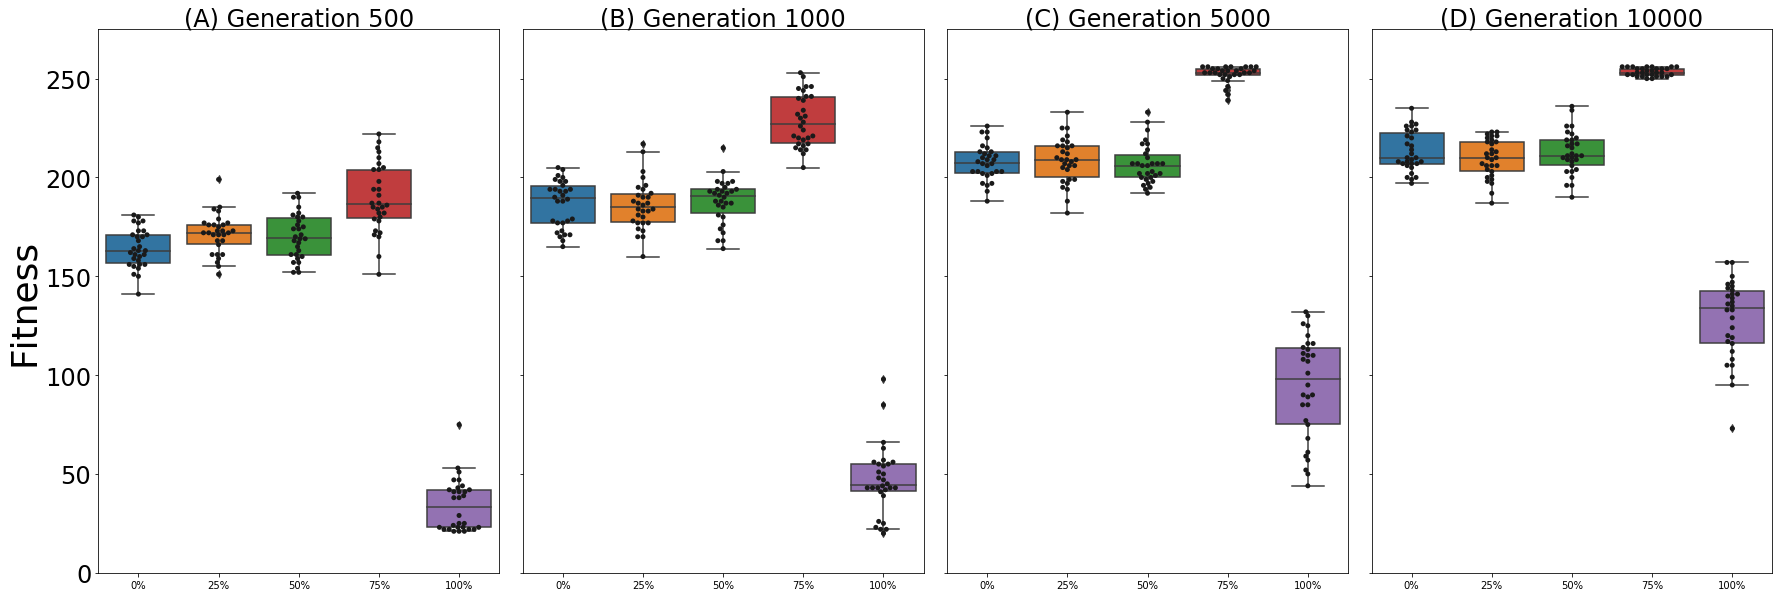

In [41]:
# Importance of not listening
df_500 = dfs["500"]["FC16"][dfs["500"]["FC16"]["treatment"].str.contains("_FS16_")] 
df_1000 = dfs["1000"]["FC16"][dfs["1000"]["FC16"]["treatment"].str.contains("_FS16_")] 
df_5000 = dfs["5000"]["FC16"][dfs["5000"]["FC16"]["treatment"].str.contains("_FS16_")] 
df_10000 = dfs["10000"]["FC16"][dfs["10000"]["FC16"]["treatment"].str.contains("_FS16_")]

order_ES16 = ["BT0.0_ES16_FS16_RNDSIG1_HWCORES4_HWFUNCNT16", "BT0.25_ES16_FS16_RNDSIG1_HWCORES4_HWFUNCNT16", "BT0.50_ES16_FS16_RNDSIG1_HWCORES4_HWFUNCNT16", "BT0.75_ES16_FS16_RNDSIG1_HWCORES4_HWFUNCNT16", "BT1.0_ES16_FS16_RNDSIG1_HWCORES4_HWFUNCNT16"]
labels = ["0%", "25%", "50%", "75%", "100%"]

fig = plt.figure(1)
gridspec.GridSpec(1,12)
fig.set_size_inches(30,10)

y_lim_max = 275
y_tick_labels_fs = 24
y_axis_label_fs = 36
x_axis_label_fs = 24

ax1 = plt.subplot2grid((1,12),(0,0),colspan=3)
plot1 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_500,  orient = "v", order=order_ES16,ax=ax1)
sns.swarmplot(x="treatment", y="max_fitness", data=df_500, orient="v", order=order_ES16, ax=ax1, color=".1")
ax1.set_xticklabels(labels)
ax1.set_xlabel("(A) Generation 500")
ax1.set_ylabel("Fitness")
ax1.set_ylim(0, y_lim_max)
for thing in ax1.get_yticklabels():
    thing.set_fontsize(y_tick_labels_fs)
ax1.yaxis.label.set_fontsize(y_axis_label_fs)
ax1.xaxis.label.set_fontsize(x_axis_label_fs)
ax1.xaxis.set_label_position('top') 

ax2 = plt.subplot2grid((1,12),(0,3),colspan=3)
plot2 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_1000,  orient = "v", order=order_ES16,ax=ax2)
sns.swarmplot(x="treatment", y="max_fitness", data=df_1000, orient="v", order=order_ES16, ax=ax2, color=".1")
ax2.set_xticklabels(labels)
ax2.set_xlabel("(B) Generation 1000")
ax2.set_ylabel("")
ax2.set_ylim(0, y_lim_max)
plt.setp(ax2.get_yticklabels(), visible = False)
ax2.xaxis.label.set_fontsize(x_axis_label_fs)
ax2.xaxis.set_label_position('top') 

ax3 = plt.subplot2grid((1,12),(0,6),colspan=3)
plot3 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_5000,  orient = "v", order=order_ES16,ax=ax3)
sns.swarmplot(x="treatment", y="max_fitness", data=df_5000, orient="v", order=order_ES16, ax=ax3, color=".1")
ax3.set_xticklabels(labels)
ax3.set_xlabel("(C) Generation 5000")
ax3.set_ylabel("")
ax3.set_ylim(0, y_lim_max)
plt.setp(ax3.get_yticklabels(), visible = False)
ax3.xaxis.label.set_fontsize(x_axis_label_fs)
ax3.xaxis.set_label_position('top') 

ax4 = plt.subplot2grid((1,12),(0,9),colspan=3)
plot4 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_10000,  orient = "v", order=order_ES16,ax=ax4)
sns.swarmplot(x="treatment", y="max_fitness", data=df_10000, orient="v", order=order_ES16, ax=ax4, color=".1")
ax4.set_xticklabels(labels)
ax4.set_xlabel("(D) Generation 10000")
ax4.set_ylabel("")
ax4.set_ylim(0, y_lim_max)
plt.setp(ax4.get_yticklabels(), visible = False)
ax4.xaxis.label.set_fontsize(x_axis_label_fs)
ax4.xaxis.set_label_position('top') 

fig.savefig("not_listening_fc16.png", bbox_inches='tight')


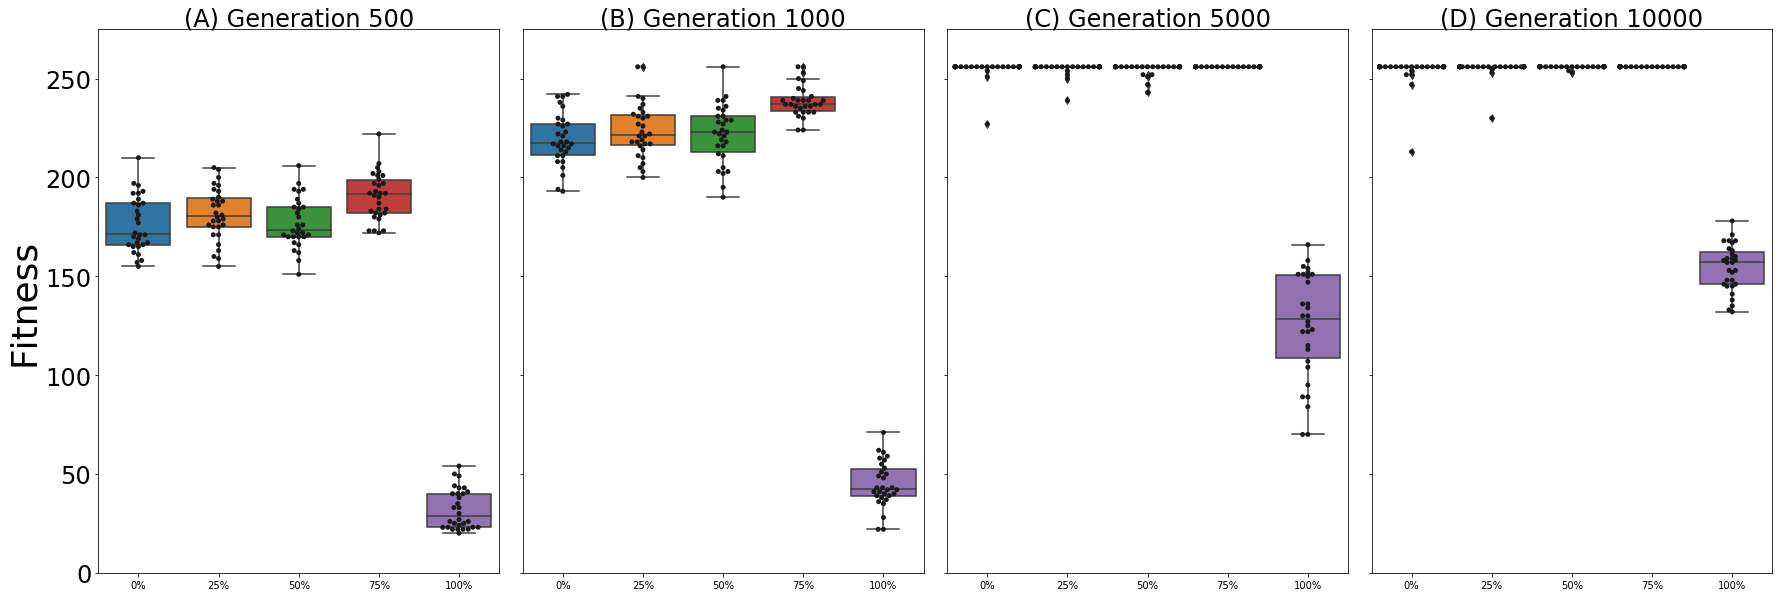

In [42]:
# Importance of not listening
df_500 = dfs["500"]["FC32"][dfs["500"]["FC32"]["treatment"].str.contains("_FS16_")] 
df_1000 = dfs["1000"]["FC32"][dfs["1000"]["FC32"]["treatment"].str.contains("_FS16_")] 
df_5000 = dfs["5000"]["FC32"][dfs["5000"]["FC32"]["treatment"].str.contains("_FS16_")] 
df_10000 = dfs["10000"]["FC32"][dfs["10000"]["FC32"]["treatment"].str.contains("_FS16_")]

order_ES16 = ["BT0.0_ES16_FS16_RNDSIG1", "BT0.25_ES16_FS16_RNDSIG1", "BT0.50_ES16_FS16_RNDSIG1", "BT0.75_ES16_FS16_RNDSIG1", "BT1.0_ES16_FS16_RNDSIG1"]
labels = ["0%", "25%", "50%", "75%", "100%"]

fig = plt.figure(1)
gridspec.GridSpec(1,12)
fig.set_size_inches(30,10)

y_lim_max = 275
y_tick_labels_fs = 24
y_axis_label_fs = 36
x_axis_label_fs = 24

ax1 = plt.subplot2grid((1,12),(0,0),colspan=3)
plot1 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_500,  orient = "v", order=order_ES16,ax=ax1)
sns.swarmplot(x="treatment", y="max_fitness", data=df_500, orient="v", order=order_ES16, ax=ax1, color=".1")
ax1.set_xticklabels(labels)
ax1.set_xlabel("(A) Generation 500")
ax1.set_ylabel("Fitness")
ax1.set_ylim(0, y_lim_max)
for thing in ax1.get_yticklabels():
    thing.set_fontsize(y_tick_labels_fs)
ax1.yaxis.label.set_fontsize(y_axis_label_fs)
ax1.xaxis.label.set_fontsize(x_axis_label_fs)
ax1.xaxis.set_label_position('top') 

ax2 = plt.subplot2grid((1,12),(0,3),colspan=3)
plot2 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_1000,  orient = "v", order=order_ES16,ax=ax2)
sns.swarmplot(x="treatment", y="max_fitness", data=df_1000, orient="v", order=order_ES16, ax=ax2, color=".1")
ax2.set_xticklabels(labels)
ax2.set_xlabel("(B) Generation 1000")
ax2.set_ylabel("")
ax2.set_ylim(0, y_lim_max)
plt.setp(ax2.get_yticklabels(), visible = False)
ax2.xaxis.label.set_fontsize(x_axis_label_fs)
ax2.xaxis.set_label_position('top') 

ax3 = plt.subplot2grid((1,12),(0,6),colspan=3)
plot3 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_5000,  orient = "v", order=order_ES16,ax=ax3)
sns.swarmplot(x="treatment", y="max_fitness", data=df_5000, orient="v", order=order_ES16, ax=ax3, color=".1")
ax3.set_xticklabels(labels)
ax3.set_xlabel("(C) Generation 5000")
ax3.set_ylabel("")
ax3.set_ylim(0, y_lim_max)
plt.setp(ax3.get_yticklabels(), visible = False)
ax3.xaxis.label.set_fontsize(x_axis_label_fs)
ax3.xaxis.set_label_position('top') 

ax4 = plt.subplot2grid((1,12),(0,9),colspan=3)
plot4 = sns.boxplot(x = "treatment", y = "max_fitness", data = df_10000,  orient = "v", order=order_ES16,ax=ax4)
sns.swarmplot(x="treatment", y="max_fitness", data=df_10000, orient="v", order=order_ES16, ax=ax4, color=".1")
ax4.set_xticklabels(labels)
ax4.set_xlabel("(D) Generation 10000")
ax4.set_ylabel("")
ax4.set_ylim(0, y_lim_max)
plt.setp(ax4.get_yticklabels(), visible = False)
ax4.xaxis.label.set_fontsize(x_axis_label_fs)
ax4.xaxis.set_label_position('top') 

fig.savefig("not_listening_fc32.png", bbox_inches='tight')


In [36]:
df_10000[df_10000["treatment"].str.contains("BT1.0")]

,benchmark,treatment,run_id,update,mean_fitness,max_fitness
2610,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2371,10000,80.131,157.0
2611,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2372,10000,79.011,153.0
2612,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2373,10000,79.911,168.0
2613,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2374,10000,57.868,132.0
2614,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2375,10000,90.388,168.0
2615,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2376,10000,81.107,167.0
2616,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2377,10000,80.603,159.0
2617,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2378,10000,79.039,153.0
2618,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2379,10000,79.888,178.0
2619,binding_thresholds,BT1.0_ES16_FS16_RNDSIG1,2380,10000,56.907,133.0
